Morphological Operations

Saving 11_amplitude.jpg to 11_amplitude.jpg


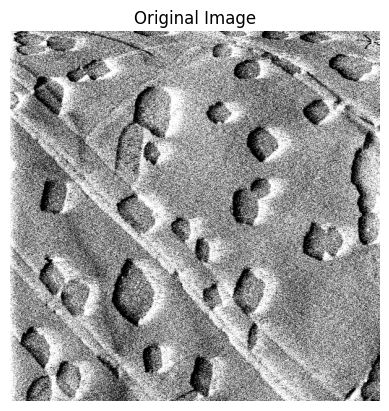

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

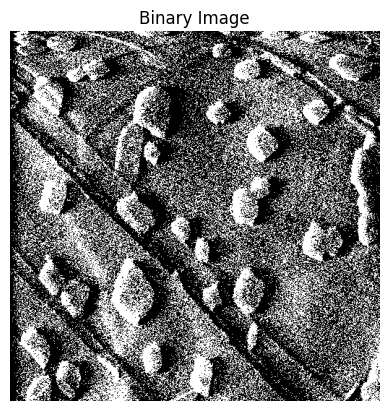

In [ ]:
# Apply thresholding- Thresholding the image to create a binary image where the objects are white, and the background is black.
_, binary_image = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()


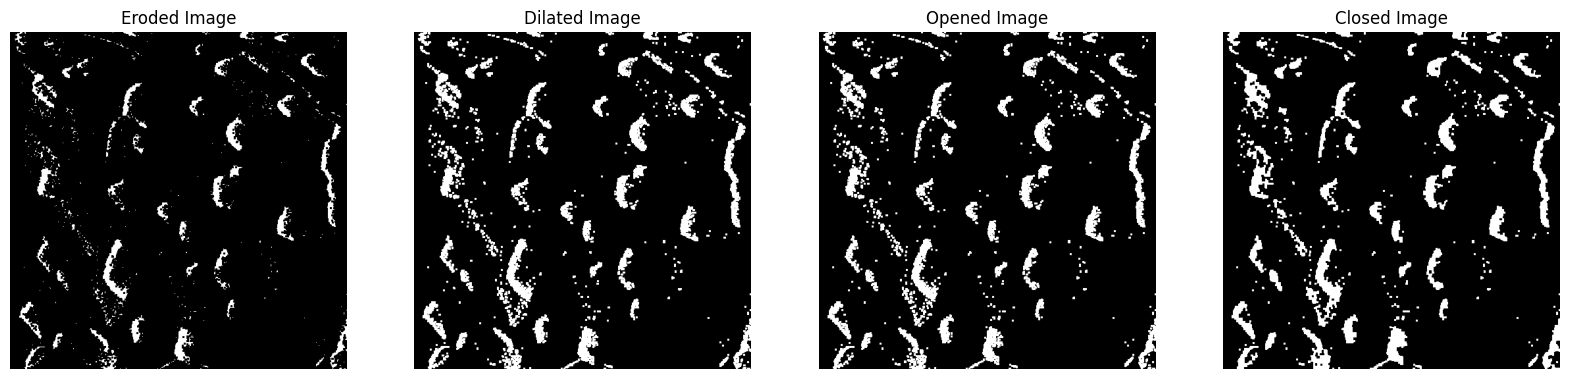

In [ ]:
# Apply erosion followed by dilation (opening) to remove noise, and then apply dilation followed by erosion (closing) to close gaps in the object outlines.

# Define the kernel size
kernel = np.ones((3, 3), np.uint8)

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)

# Apply dilation
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Apply opening (erosion followed by dilation)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Apply closing (dilation followed by erosion)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Display the morphological transformations
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(eroded_image, cmap='gray')
ax[0].set_title('Eroded Image')
ax[0].axis('off')
ax[1].imshow(dilated_image, cmap='gray')
ax[1].set_title('Dilated Image')
ax[1].axis('off')
ax[2].imshow(opened_image, cmap='gray')
ax[2].set_title('Opened Image')
ax[2].axis('off')
ax[3].imshow(closed_image, cmap='gray')
ax[3].set_title('Closed Image')
ax[3].axis('off')
plt.show()


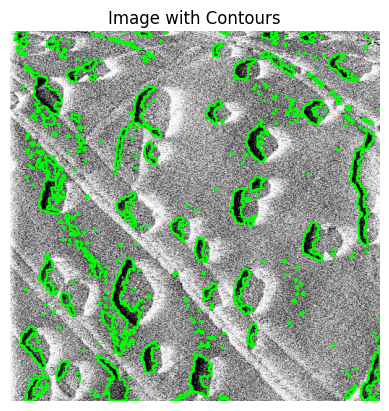

In [ ]:
# Find contours
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color display
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(contour_image)
plt.title('Image with Contours')
plt.axis('off')
plt.show()

Fine-tuning our morphological operations

Saving 11_amplitude.jpg to 11_amplitude (1).jpg


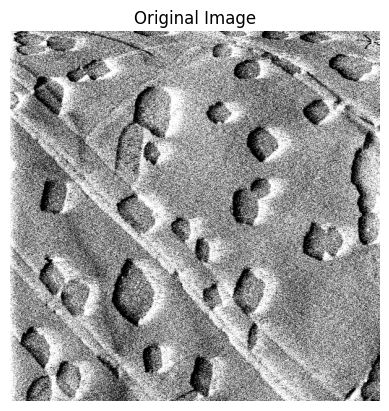

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

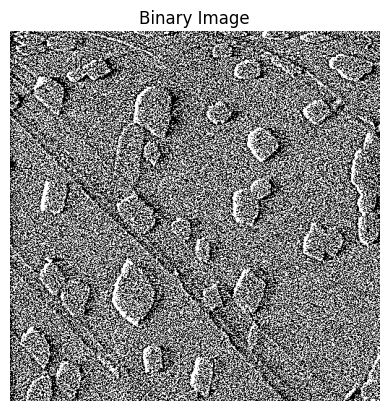

In [ ]:
#Adaptive thresholding can help in highlighting the edges more effectively than simple global thresholding.

# Apply adaptive thresholding
binary_image = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY_INV, 11, 2)

# Display the binary image
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

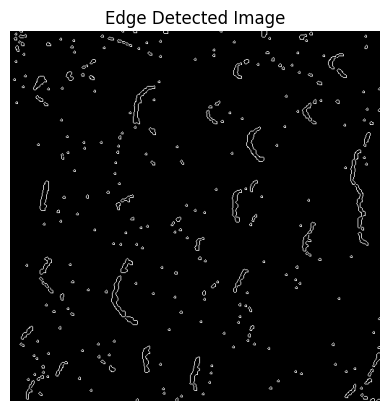

In [ ]:
#Apply erosion and dilation to remove noise and then use Canny edge detection to highlight the edges.

# Define the kernel size
kernel = np.ones((3, 3), np.uint8)

# Apply erosion and dilation
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)

# Apply opening (erosion followed by dilation)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

# Apply closing (dilation followed by erosion)
closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel)

# Apply Canny edge detection
edges = cv2.Canny(closed_image, 100, 200)

# Display the edge-detected image
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image')
plt.axis('off')
plt.show()

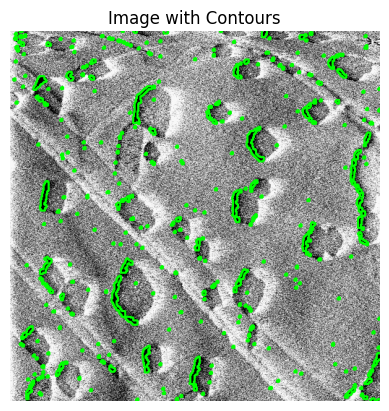

In [ ]:
# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for color display
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the image with contours
plt.imshow(contour_image)
plt.title('Image with Contours')
plt.axis('off')
plt.show()

https://www.ni.com/docs/en-US/bundle/ni-vision-concepts-help/page/morphological_segmentation.html

Region Growing bases paper

In [ ]:
from google.colab import files
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Upload the AFM image
uploaded = files.upload()

# Load the image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

Saving 11_amplitude.jpg to 11_amplitude (2).jpg


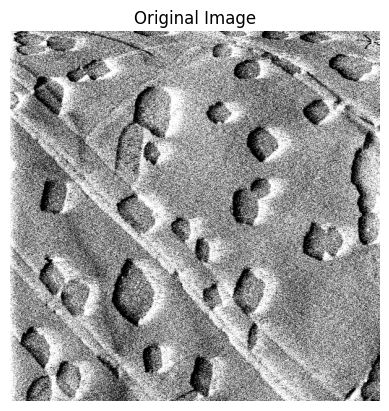

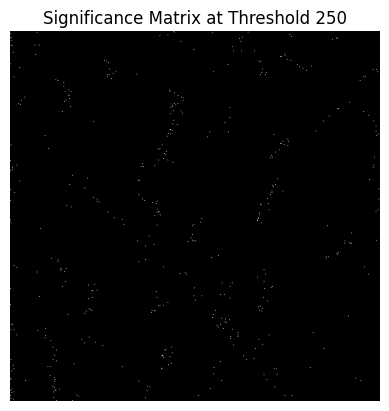

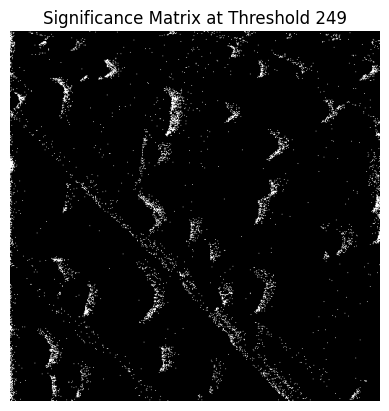

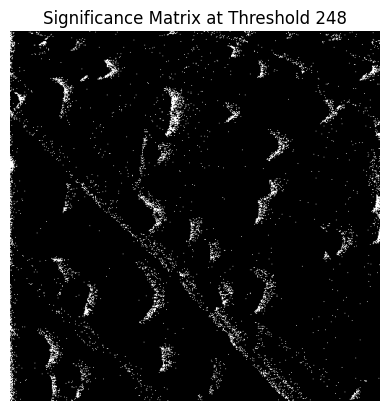

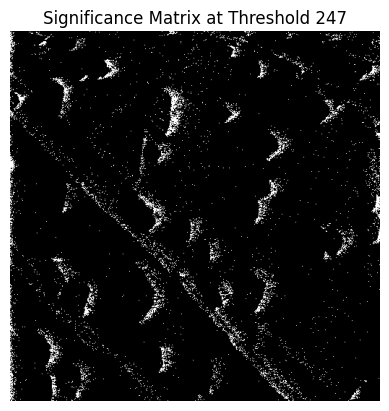

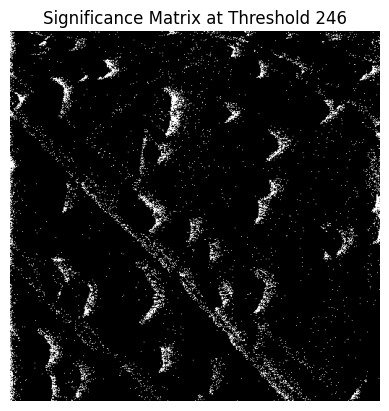

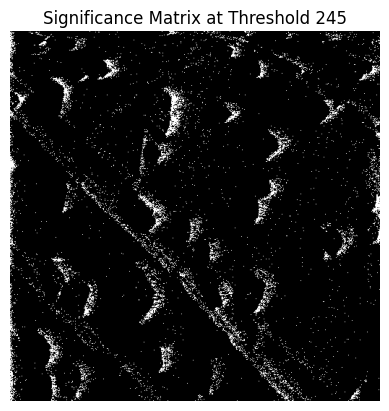

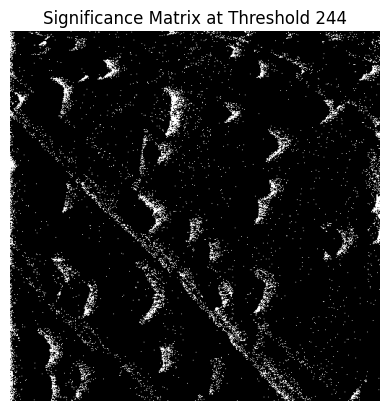

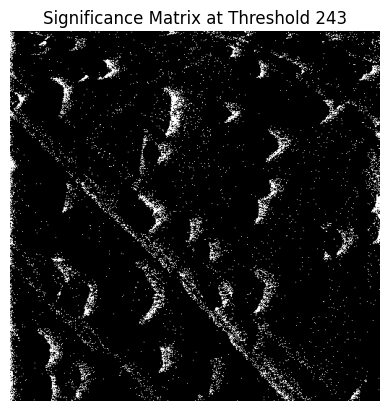

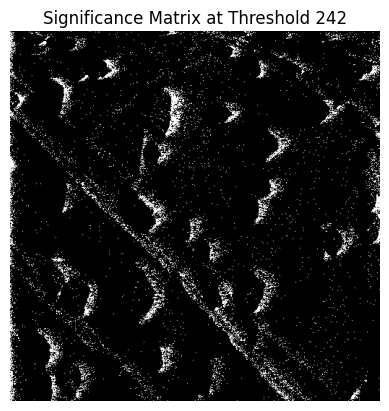

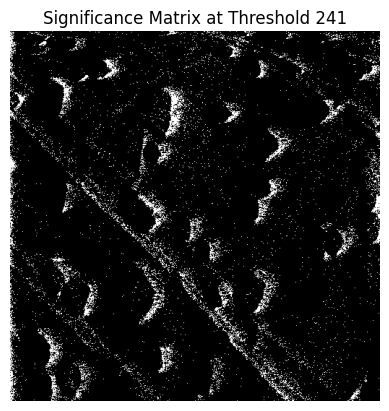

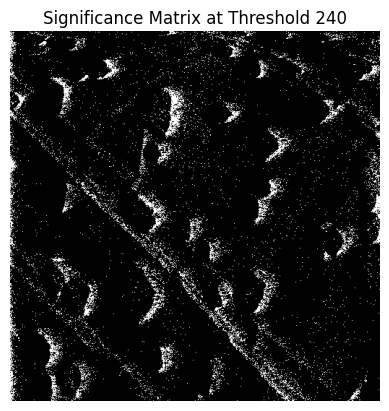

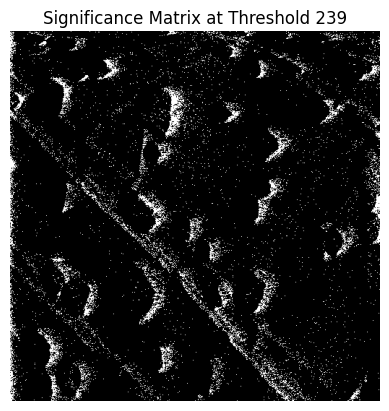

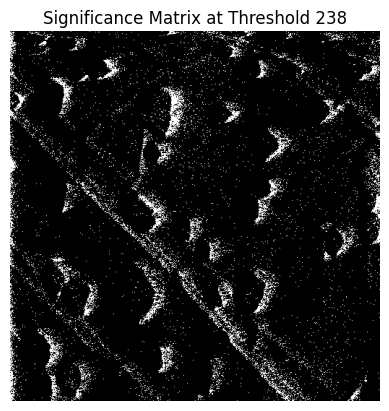

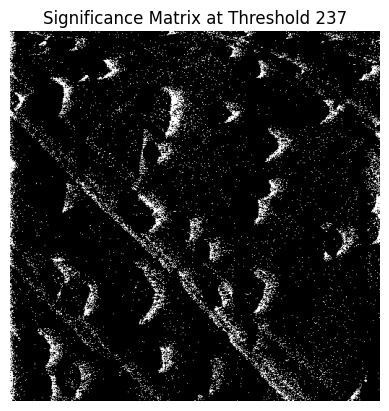

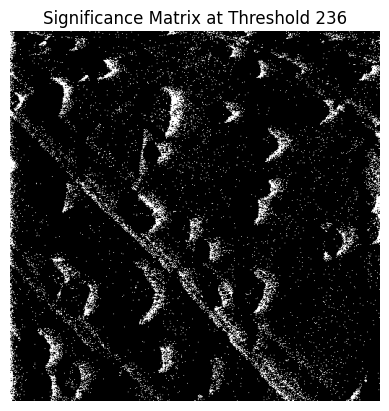

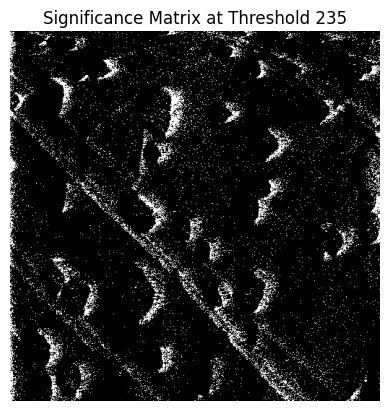

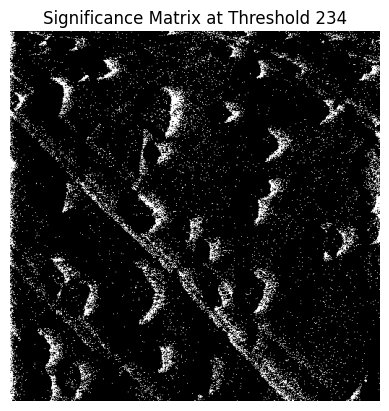

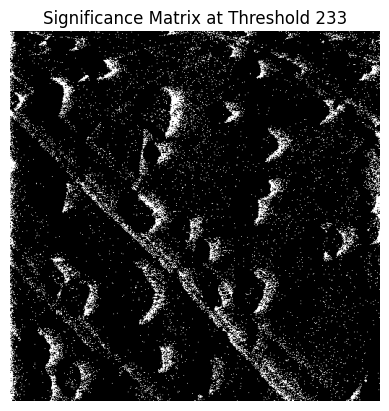

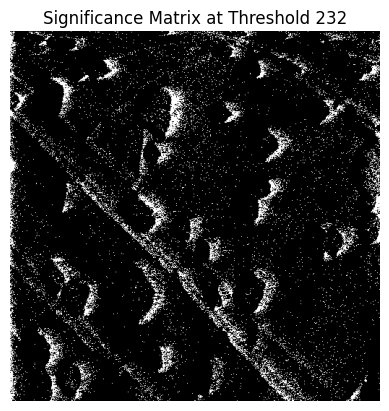

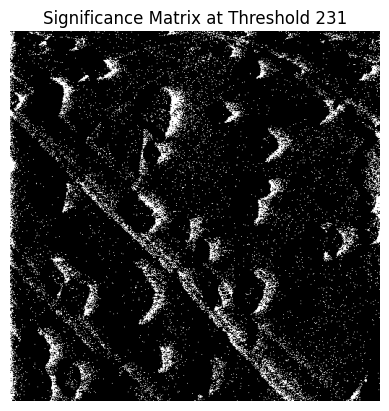

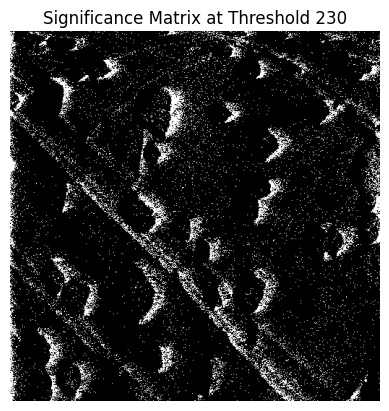

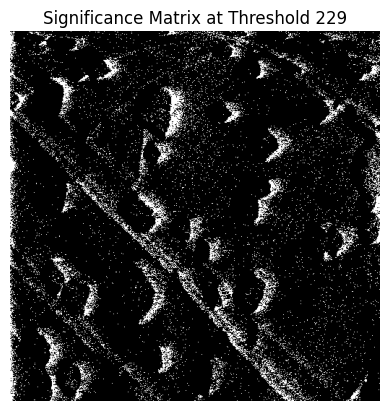

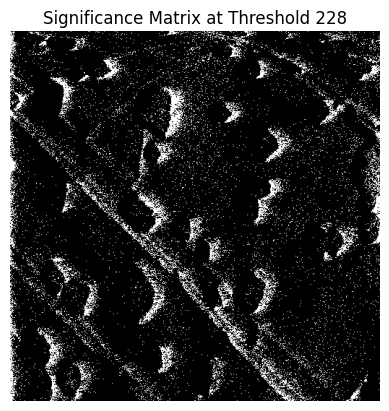

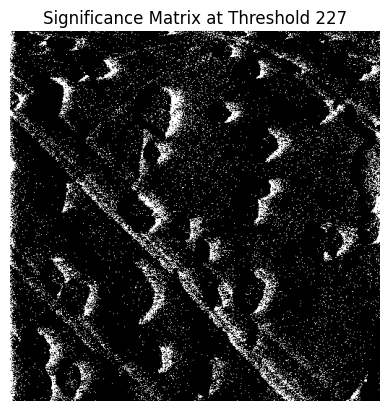

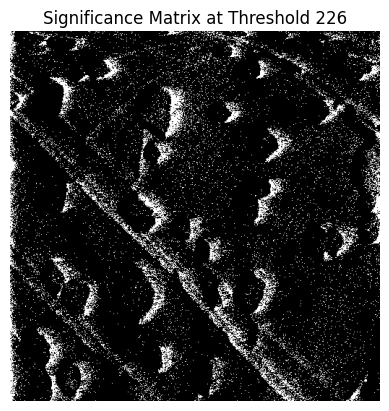

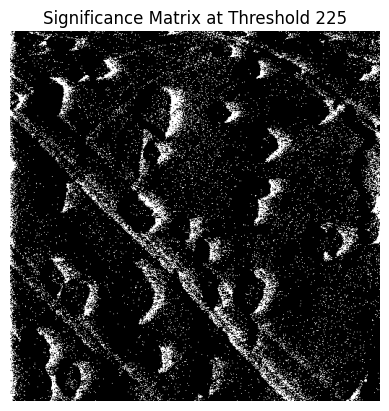

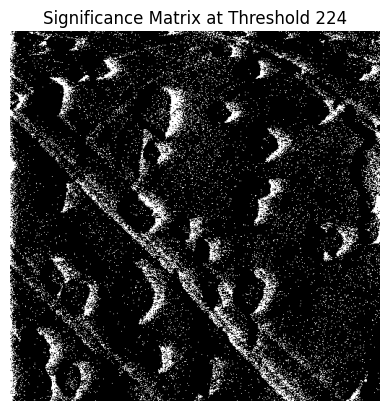

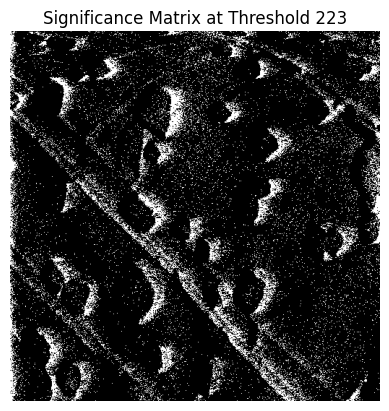

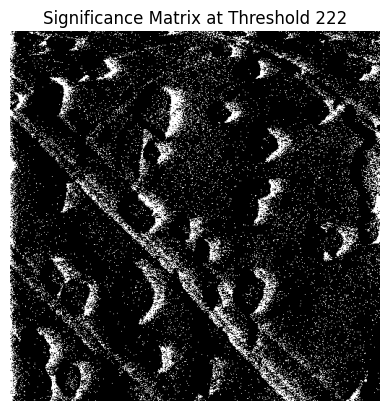

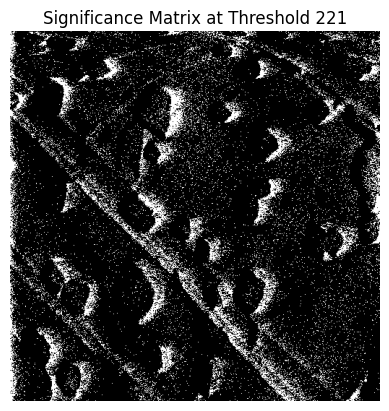

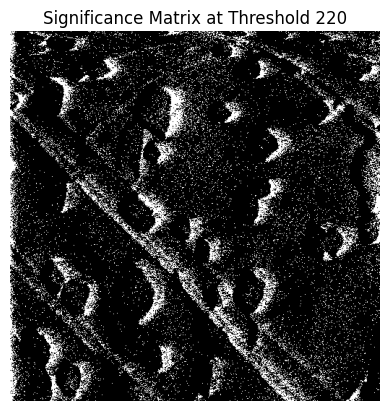

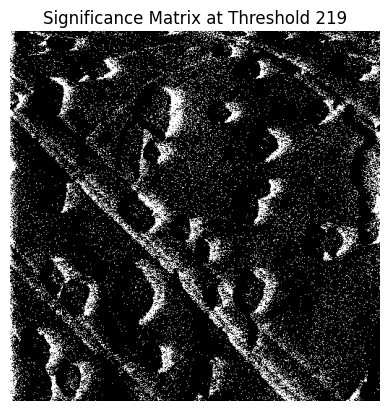

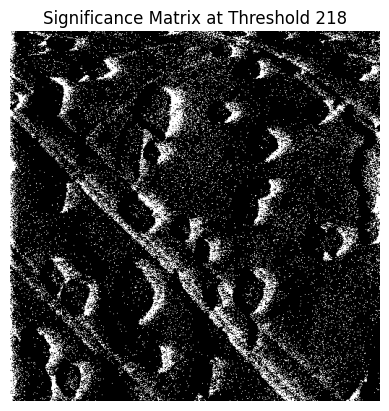

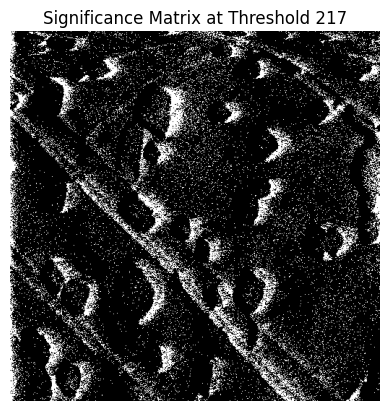

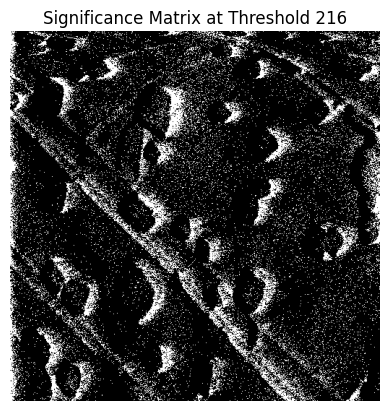

KeyboardInterrupt: 

In [ ]:
# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image.")
else:
    # Display the original image
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    def wave_region_growing(image):
        Y, X = image.shape
        segmentation_matrix = np.zeros_like(image, dtype=np.int32)
        segment_counter = 0
        brightness_threshold = np.max(image)

        # Segmentation cycle
        while brightness_threshold >= 0:
            # Find significant pixels above the current threshold
            significance_matrix = (image >= brightness_threshold).astype(np.uint8)

            # Debug: Display the significance matrix
            plt.imshow(significance_matrix, cmap='gray')
            plt.title(f'Significance Matrix at Threshold {brightness_threshold}')
            plt.axis('off')
            plt.show()

            # Label connected components in the significance matrix
            labeled_matrix, num_features = label(significance_matrix)

            if num_features == 0:
                brightness_threshold -= 1
                continue

            for feature in range(1, num_features + 1):
                mask = (labeled_matrix == feature)
                if np.any(segmentation_matrix[mask] == 0):
                    segment_counter += 1
                    segmentation_matrix[mask] = segment_counter

            brightness_threshold -= 1

        return segmentation_matrix

    # Apply the algorithm
    segmented_image = wave_region_growing(image)

    # Normalize the segmented image for visualization
    segmented_image_normalized = segmented_image / np.max(segmented_image)

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(segmented_image_normalized, cmap='nipy_spectral')
    plt.title('Segmented Image')
    plt.axis('off')
    plt.show()

Automated Image Segmentation Paper

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_otsu
from scipy.ndimage import gaussian_filter
from google.colab import files
from PIL import Image

def adaptive_thresholding(image, block_size=35, offset=10):
    """
    Perform adaptive thresholding to create an initial mask.
    """
    blur_image = gaussian_filter(image, sigma=1)
    thresh_image = cv2.adaptiveThreshold(
        blur_image.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, block_size, offset
    )
    return thresh_image

def contour_expansion(image, mask):
    """
    Expand the contour to optimize boundary detection.
    """
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    expanded_mask = np.zeros_like(image, dtype=np.uint8)
    for contour in contours:
        cv2.drawContours(expanded_mask, [contour], -1, (255), thickness=cv2.FILLED)
    return expanded_mask

def polynomial_fitting(image, mask, order=3):
    """
    Perform polynomial fitting on the background data points.
    """
    y_indices, x_indices = np.where(mask == 0)

    # Ensure we have valid indices
    if len(y_indices) == 0 or len(x_indices) == 0:
        raise ValueError("No background points found for polynomial fitting.")

    # Fit polynomial surface
    z = np.polyfit(x_indices, y_indices, order)
    polynomial = np.poly1d(z)
    return polynomial

def flatten_image(image, polynomial):
    """
    Subtract the polynomial surface from the raw image to flatten it.
    """
    xx, yy = np.meshgrid(np.arange(image.shape[1]), np.arange(image.shape[0]))
    surface = polynomial(xx)
    flatten_image = image - surface
    return flatten_image

def main():
    # Upload the AFM image
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    image = io.imread(image_path, as_gray=True)

    # Step 1: Perform adaptive thresholding
    mask = adaptive_thresholding(image)

    # Check if the mask is valid
    if np.all(mask == 255):
        raise ValueError("Mask does not contain any background pixels; adjust thresholding parameters.")

    # Step 2: Optimize boundary detection with contour expansion
    expanded_mask = contour_expansion(image, mask)

    # Check expanded mask
    if np.all(expanded_mask == 255):
        raise ValueError("Expanded mask does not contain any background pixels; adjust contour expansion.")

    # Step 3: Polynomial fitting
    polynomial = polynomial_fitting(image, expanded_mask)

    # Step 4: Flatten the image
    flattened_image = flatten_image(image, polynomial)

    # Display the results
    plt.figure(figsize=(12, 8))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Flattened Image")
    plt.imshow(flattened_image, cmap='gray')
    plt.show()

if __name__ == "__main__":
    main()

Saving 1_amplitude.jpg to 1_amplitude.jpg


ValueError: Mask does not contain any background pixels; adjust thresholding parameters.